# Otimização em série

Aqui farei a otmização do controlador individual por junta pois a otimização em lote se mostrou ineficiente para mecanismos com uma quantidade elevada de graus de liberdade.

In [1]:
include("../comum.jl")
include("../modelos.jl")
using Evolutionary, Plots;
pyplot();
#plotlyjs();

In [13]:
Ts = 0.08     #período de leitura
tend = 2.0    #tempo final
t0 = 0.0      # tempo inicial
popul  = 6   # população
iterac = 5   #iterações
α = 10.       #parâmetro para o erro
β = 0.01      #parâmetro para o jerk
γ = 0.1       #parâmetro para o torque
per = 1/2     #inicio da leitura do vetor a parti de per do comprimento total
xr = SVector{7}([1.,1.,0.5,0.6,0.5,1.2,0.8]) #referências
kp_end = AbstractFloat[]
kv_end = AbstractFloat[];

## Função custo

In [4]:
function generateCusto(junta::Integer)
    out = function custo(gain::Vector{Float64})
        kp = SMatrix{7,7}(diagm(gain[1:7]))
        kv = SMatrix{7,7}(diagm(gain[8:end]))
        x, v, t, a, ta, j, tj, τ, t_tau = kukaRobot(kp, kv, Ts, t0, tend, xr)
        sizeVector = length(x[1])

        erro_sum = 0.
        erro = -(x[junta]-xr[junta])
        erro_sum += sum(abs.(erro[floor(Integer,sizeVector*per):end])) 

        jerk_sum = 0.
        jerk_sum += sum(abs.(j[junta]))
        
        torque_sum = 0.
        torque_sum += sum(abs.(τ[junta]))
        
        erro_sum = erro_sum * α
        jerk_sum = jerk_sum * β 
        torque_sum = torque_sum * γ

        out =  erro_sum + jerk_sum + torque_sum
        out
    end
end;

## Otimização junta 7

In [3]:
function gerador7(n)
    n = n/2
    kp = push!(zeros(n-1),rand()*rand([10.,100.,1000.,10000]))
    kv = push!(zeros(n-1),rand()*rand([10.,100.,1000.]))
    vcat(kp,kv)
end;

In [14]:
N = 14
result, fitness, cnt = ga(generateCusto(7), N; initPopulation = gerador7, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

 Progress:|███████████████████████████████████████████████████| 100.0%

([1.62125e-5, -0.000732422, 4.76837e-7, 6.86646e-5, 0.0625, 0.0, 7448.48, 4.76837e-7, 0.0, 0.0, -0.25, 0.000977039, 0.0, 35.4613], 0.4913101077621017, 5, 0.3196808668375045, Dict{Symbol,Any}())

In [21]:
push!(kp_end, result[7])
push!(kv_end, result[14])
Markdown.parse("---|junta 7\n---|---\n**KP**|$(round(result[7],2))\n**KV**|$(round(result[14],2))")

|     –- | junta 7 |
| ------:| -------:|
| **KP** | 7448.48 |
| **KV** |   35.46 |


## Otimização junta 6

In [22]:
function gerador6(n)
    n = n/2
    kp = push!(zeros(n-2),rand()*rand([10.,100.,1000.,10000]))
    push!(kp,result[7])
    kv = push!(zeros(n-2),rand()*rand([10.,100.,1000.]))
    push!(kv,result[14])
    vcat(kp,kv)
end;

In [23]:
N = 14
result, fitness, cnt = ga(generateCusto(6), N; initPopulation = gerador6, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

 Progress:|███████████████████████████████████████████████████| 100.0%

([0.0, 0.000843928, 0.000124665, 0.0570168, 0.0, 3051.9, 7448.54, -0.00301881, -3.22669e-7, -1.20203e-7, 0.0, 2.41678e-5, 49.3884, 35.4613], 13.035005098209979, 5, 0.9539782006258157, Dict{Symbol,Any}())

In [31]:
push!(kp_end, result[6])
push!(kv_end, result[13])
Markdown.parse("---|junta 6\n---|---\n**KP**|$(round(result[6],2))\n**KV**|$(round(result[13],2))")

|     –- | junta 6 |
| ------:| -------:|
| **KP** |  3051.9 |
| **KV** |   49.39 |


## Otimização junta 5

In [32]:
function gerador5(n)
    n = n/2
    kp = push!(zeros(n-3),rand()*rand([10.,100.,1000.,10000]))
    kp = vcat(kp,result[6:7])
    kv = push!(zeros(n-3),rand()*rand([10.,100.,1000.]))
    kv = vcat(kv,result[13:14])
    vcat(kp,kv)
end;

In [40]:
N = 14
result, fitness, cnt = ga(generateCusto(5), N; initPopulation = gerador5, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

 Progress:|███████████████████████████████████████████████████| 100.0%

([0.0213954, 0.0, 0.00111071, 0.0, 6811.77, 3051.9, 7448.54, -6.53899e-7, 0.000664656, -0.000214247, 0.0, 88.2716, 49.6952, 35.4613], 7.256287172125081, 5, 0.0, Dict{Symbol,Any}())

In [47]:
push!(kp_end, result[5])
push!(kv_end, result[12])
Markdown.parse("---|junta 5\n---|---\n**KP**|$(round(result[5],2))\n**KV**|$(round(result[12],2))")

|     –- | junta 5 |
| ------:| -------:|
| **KP** | 6811.77 |
| **KV** |   88.27 |


## Otimização junta 4

In [48]:
function gerador4(n)
    n = n/2
    kp = push!(zeros(n-4),rand()*rand([10.,100.,1000.,10000]))
    kp = vcat(kp,result[5:7])
    kv = push!(zeros(n-4),rand()*rand([10.,100.,1000.]))
    kv = vcat(kv,result[12:14])
    vcat(kp,kv)
end;

In [58]:
N = 14
result, fitness, cnt = ga(generateCusto(4), N; initPopulation = gerador4, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

 Progress:|███████████████████████████████████████████████████| 100.0%

([0.0, 0.0, 0.0, 3369.41, 6811.77, 3051.9, 7448.54, 0.0, 0.0, 0.0, 55.0186, 88.2697, 49.9922, 35.4613], 32.0344206808741, 5, 0.0, Dict{Symbol,Any}())

In [65]:
push!(kp_end, result[4])
push!(kv_end, result[11])
Markdown.parse("---|junta 4\n---|---\n**KP**|$(round(result[4],2))\n**KV**|$(round(result[11],2))")

|     –- | junta 4 |
| ------:| -------:|
| **KP** | 3369.41 |
| **KV** |   55.02 |


## Otimização junta 3

In [66]:
function gerador3(n)
    n = n/2
    kp = push!(zeros(n-5),rand()*rand([10.,100.,1000.,10000]))
    kp = vcat(kp,result[4:7])
    kv = push!(zeros(n-5),rand()*rand([10.,100.,1000.]))
    kv = vcat(kv,result[11:14])
    vcat(kp,kv)
end;

In [71]:
N = 14
result, fitness, cnt = ga(generateCusto(3), N; initPopulation = gerador3, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

 Progress:|███████████████████████████████████████████████████| 100.0%

([0.0, 0.0, 2475.58, 3369.38, 6811.77, 3051.9, 7448.54, 0.0, 0.0, 410.167, 55.0641, 88.2697, 50.0011, 35.4613], 19.929410056497414, 5, 0.009515615177186021, Dict{Symbol,Any}())

In [75]:
push!(kp_end, result[3])
push!(kv_end, result[10])
Markdown.parse("---|junta 3\n---|---\n**KP**|$(round(result[3],2))\n**KV**|$(round(result[10],2))")

|     –- | junta 3 |
| ------:| -------:|
| **KP** | 2475.58 |
| **KV** |  410.17 |


## Otimização junta 2

In [82]:
function gerador2(n)
    n = n/2
    kp = push!(zeros(n-6),rand()*rand([10.,100.,1000.,10000]))
    kp = vcat(kp,result[3:7])
    kv = push!(zeros(n-6),rand()*rand([10.,100.,1000.]))
    kv = vcat(kv,result[10:14])
    vcat(kp,kv)
end;

In [147]:
N = 14
result, fitness, cnt = ga(generateCusto(2), N; initPopulation = gerador2, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

 Progress:|███████████████████████████████████████████████████| 100.0%

([0.0, 64.8822, 2475.58, 3369.38, 6811.77, 3051.9, 7448.54, 0.0, 149.521, 410.167, 55.0641, 88.2697, 50.2511, 35.4613], 114.75795130445238, 5, 0.0, Dict{Symbol,Any}())

## Otimização junta 1

In [ ]:
function gerador1(n)
    n = n/2
    kp = push!(zeros(n-7),rand()*rand([10.,100.,1000.,10000]))
    kp = vcat(kp,result[2:7])
    kv = push!(zeros(n-7),rand()*rand([10.,100.,1000.]))
    kv = vcat(kv,result[9:14])
    vcat(kp,kv)
end;

In [ ]:
N = 14
result, fitness, cnt = ga(generateCusto(1), N; initPopulation = gerador1, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

# Resultado Final

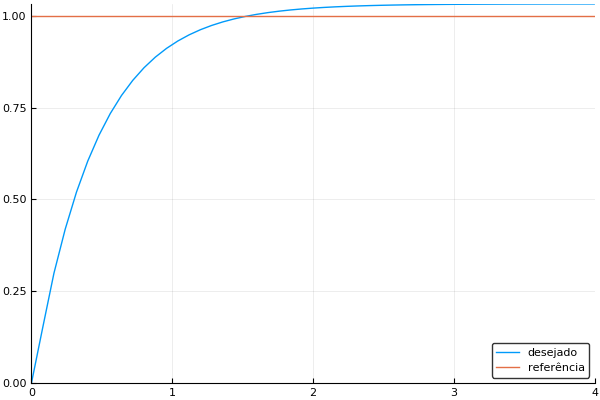

In [146]:
t_end_new = 2.
kp = SMatrix{7,7}(diagm(result[1:7]))
kv = SMatrix{7,7}(diagm(result[8:end]))

x, v, t, a, ta, j, tj, τ, t_tau = kukaRobot(kp, kv, Ts, t0, t_end_new, xr);
plotx(2)

In [141]:
erro = []
for i=1:7
    push!(erro, -(x[i] .- xr[i]))
end 
tabela(erro, "Erro")

|              –- | junta 1 | junta 2 | junta 3 | junta 4 | junta 5 | junta 6 | junta 7 |
| ---------------:| -------:| -------:| -------:| -------:| -------:| -------:| -------:|
| **Erro máximo** |    2.13 |     1.0 |     0.5 |     0.6 |     0.5 |     1.2 |     0.8 |
| **Erro mínimo** |     1.0 |     0.0 |     0.0 |     0.0 |     0.0 |     0.0 |     0.0 |
|  **Erro total** |   52.26 |    5.62 |    1.32 |     0.7 |     0.5 |    1.22 |     0.8 |


In [142]:
function plotx(i)
    p1 = plot(t,x[i], label = "desejado")
    p1= plot!([xr[i]],seriestype= :hline, label = "referência");
end
function plotx()
    p1 = plot(t,x[1], label = "simulação 1")
    p1= plot!([xr[1]],seriestype= :hline, label = "referência 1")
    p2 = plot(t,x[2], label = "simulação 2")
    p2= plot!([xr[2]],seriestype= :hline, label = "referência 2")
    p3 = plot(t,x[3], label = "simulação 3")
    p3= plot!([xr[3]],seriestype= :hline, label = "referência 3")
    p4 = plot(t,x[4], label = "simulação 4")
    p4= plot!([xr[4]],seriestype= :hline, label = "referência 4")
    p5 = plot(t,x[5], label = "simulação 5")
    p5= plot!([xr[5]],seriestype= :hline, label = "referência 5")
    p6 = plot(t,x[6], label = "simulação 6")
    p6= plot!([xr[6]],seriestype= :hline, label = "referência 6")
    p7 = plot(t,x[7], label = "simulação 7")
    p7= plot!([xr[7]],seriestype= :hline, label = "referência 7")
    plot(p1,p2,p3,p4,p5,p6,p7, layout =(7,1))
end

plotx (generic function with 2 methods)

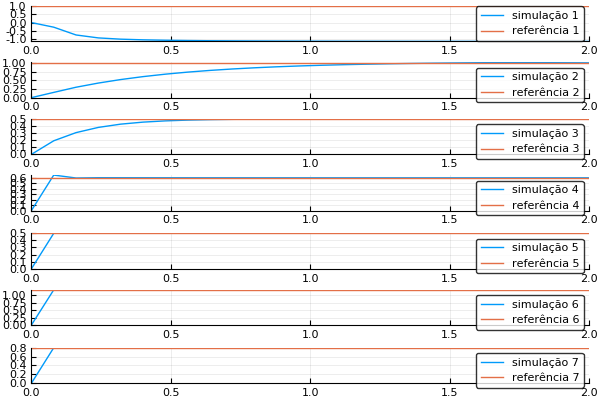

In [143]:
plotx()

In [144]:
tabela(j,"Jerk")

|              –- | junta 1 | junta 2 | junta 3 | junta 4 | junta 5 | junta 6 | junta 7 |
| ---------------:| -------:| -------:| -------:| -------:| -------:| -------:| -------:|
| **Jerk máximo** | 1197.01 |  282.56 |  396.99 |  569.77 |    21.0 |  198.23 |    0.59 |
| **Jerk mínimo** |    0.02 |    0.16 |     0.0 |     0.0 |     0.0 |     0.0 |     0.0 |
|  **Jerk total** |  1535.2 |  354.85 |  505.31 |   966.6 |   31.67 |  301.76 |    1.94 |


In [145]:
tabela(τ,"Torque")

|                –- | junta 1 | junta 2 | junta 3 | junta 4 | junta 5 | junta 6 | junta 7 |
| -----------------:| -------:| -------:| -------:| -------:| -------:| -------:| -------:|
| **Torque máximo** |     0.0 |  120.03 |   17.41 |   64.73 |     6.1 |    2.71 |    0.01 |
| **Torque mínimo** |     0.0 |   19.05 |    0.42 |    0.14 |    0.27 |    0.77 |     0.0 |
|  **Torque total** |     0.0 | 1107.34 |  117.79 |  251.06 |   22.45 |   33.39 |    0.03 |
